In [ ]:
from keras import models
from keras.layers import Input, Dense
import numpy as np

In [ ]:
#２値分類
from keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [ ]:
train_data.shape

(25000,)

In [ ]:
type(train_label[0])

numpy.int64

In [ ]:
np.count_nonzero(train_label)

12500

In [ ]:
len(train_data[1])

189

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
#one-hotエンコーディング
#sequenceの数値に該当する箇所を１としている。例えばx_train[0]ならばsequenceは[1, 14, 22...]となるので
#x_train[0][1],[0][14],[0][22]が１になる。
import numpy as np

def vectorize_sequences(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [ ]:
#Sequential
two_model = models.Sequential()
two_model.add(Dense(16, activation = 'relu', input_shape = (10000,)))
two_model.add(Dense(16, activation = 'relu'))
two_model.add(Dense(1, activation = 'sigmoid'))
two_model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
#モデルを定義
#Functional API
from keras import optimizers

input_tensor = Input(shape = (10000,))
x = Dense(16, activation = 'relu')(input_tensor)
y = Dense(16,  activation = 'relu')(x)
output_tensor = Dense(1, activation = 'sigmoid')(y)
two_model = models.Model(inputs=input_tensor, outputs=output_tensor)

two_model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
two_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = two_model.fit(x_train,
                        y_train,
                        epochs = 20,
                        batch_size = 512,
                        verbose = 0,
                        validation_split = 0.1)

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

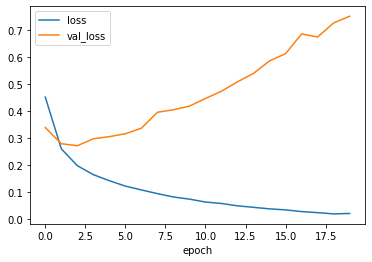

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()

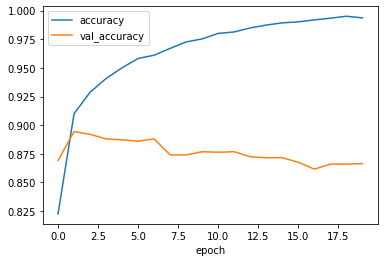

In [ ]:
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epoch")
plt.legend()

In [ ]:
loss, accuracy = two_model.evaluate(x_test,
                                    y_test,
                                    batch_size = 512)

25000/25000 [==============================] - 2s 70us/step


In [ ]:
loss

0.8040282167243957

In [ ]:
accuracy

0.8493199944496155

In [ ]:
#多値分類
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
type(test_labels)

numpy.ndarray

In [ ]:
type(test_labels[0])

numpy.int64

In [ ]:
test_labels[0]

3

In [ ]:
train_data.shape

(8982,)

In [ ]:
len(train_data[2])

139

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

In [ ]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
input_tensor = Input(shape = (10000,))
x = Dense(64, activation = 'relu')(input_tensor)
y = Dense(64,  activation = 'relu')(x)
output_tensor = Dense(46, activation = 'softmax')(y)

many_model = models.Model(inputs=input_tensor, outputs=output_tensor)
many_model.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
history = many_model.fit(x_train,
                        y_train,
                        epochs = 20,
                        batch_size = 512,
                        validation_split = 0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 1s 116us/step - loss: 2.6697 - accuracy: 0.5081 - val_loss: 1.8687 - val_accuracy: 0.6574
Epoch 2/20
8083/8083 [==============================] - 1s 81us/step - loss: 1.4141 - accuracy: 0.7219 - val_loss: 1.3973 - val_accuracy: 0.7119
Epoch 3/20
8083/8083 [==============================] - 1s 80us/step - loss: 1.0181 - accuracy: 0.7907 - val_loss: 1.2206 - val_accuracy: 0.7531
Epoch 4/20
8083/8083 [==============================] - 1s 80us/step - loss: 0.7913 - accuracy: 0.8363 - val_loss: 1.1258 - val_accuracy: 0.7697
Epoch 5/20
8083/8083 [==============================] - 1s 83us/step - loss: 0.6259 - accuracy: 0.8671 - val_loss: 1.0685 - val_accuracy: 0.7653
Epoch 6/20
8083/8083 [==============================] - 1s 80us/step - loss: 0.5012 - accuracy: 0.8962 - val_loss: 1.0264 - val_accuracy: 0.7786
Epoch 7/20
8083/8083 [==============================] - 1s 81us/step - loss: 0.403

In [ ]:
many_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


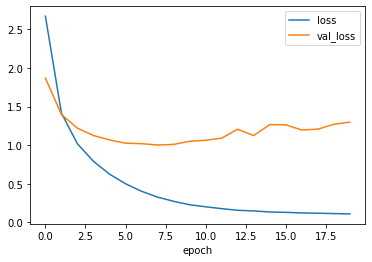

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()

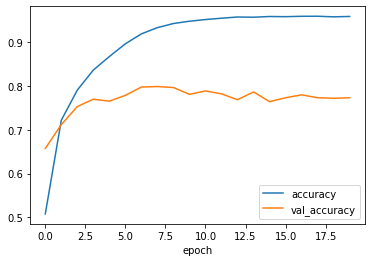

In [ ]:
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epoch")
plt.legend()

In [ ]:
loss, accuracy = many_model.evaluate(x_test,
                                     y_test,
                                     batch_size = 512)

2246/2246 [==============================] - 0s 72us/step


In [ ]:
loss

1.2002540350172632

In [ ]:
accuracy

0.7813891172409058

In [ ]:
#回帰
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [ ]:
len(train_data[0])

13

In [ ]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
def build_model():
    input_tensor = Input(shape = (13,))
    x = Dense(64, activation = 'relu')(input_tensor)
    y = Dense(64, activation = 'relu')(x)
    output_tensor = Dense(1, activation = 'relu')(y)
    model = models.Model(inputs=input_tensor, outputs=output_tensor)
    model.compile(optimizer = 'rmsprop',
                  loss = 'mse',
                  metrics = ['mae'])
    return model

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
type(train_labels[0])

numpy.float64

In [ ]:
type(train_data)

numpy.ndarray

In [ ]:
type(train_data[0])

numpy.ndarray

In [ ]:
train_labels.shape

(404,)

In [ ]:
from sklearn.model_selection import KFold
all_history = []
evals = []
kf = KFold(n_splits = 4)
for train_index, val_index in kf.split(train_data, train_labels):
    reg_model = build_model()
    all_history.append(reg_model.fit(train_data[train_index],
                                     train_labels[train_index],
                                     epochs = 100,
                                     batch_size = 1,
                                     verbose = 0,
                                     validation_split = 0.1))
    evals.append(reg_model.evaluate(train_data[val_index], train_labels[val_index]))

101/101 [==============================] - 0s 19us/step


In [ ]:
evals
#loss(mse), accuracy(mae)

[[8.023496372864978, 2.006411552429199],
 [10.45910346153939, 2.442030668258667],
 [14.17546003643829, 2.5614795684814453],
 [12.92841190070209, 2.5528979301452637]]

In [ ]:
mean_mse = 0
mean_mae = 0
for i in range(len(evals)):
    mean_mse += evals[i][0]
    mean_mae += evals[i][1]
mean_mse /= len(evals)
mean_mae /= len(evals)

In [ ]:
mean_mse

14.385418771517159

In [ ]:
mean_mae

2.614326775074005

In [ ]:
all_history[0].history.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

In [ ]:
all_mae_history = []
kf = KFold(n_splits = 4)
for train_index, val_index in kf.split(train_data, train_labels):
    reg_model = build_model()
    history = reg_model.fit(train_data[train_index],
                            train_labels[train_index],
                            epochs = 500,
                            batch_size = 1,
                            verbose = 0,
                            validation_split = 0.1)
    all_mae_history.append(history.history['val_mae'])

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(500)]

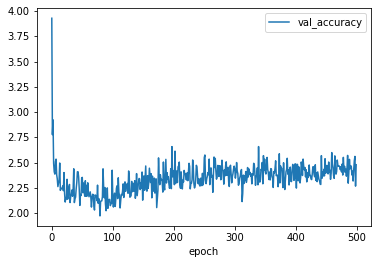

In [ ]:
plt.plot(history.epoch, average_mae_history, label="val_accuracy")
plt.xlabel("epoch")
plt.legend()

In [ ]:
#前の点から見て現在の点がどれほど移動したのかを代わりに表記
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

#最初の10個の点を削除して、グラフの複雑になってる所に注目
smooth_mae_history = smooth_curve(average_mae_history[10:])

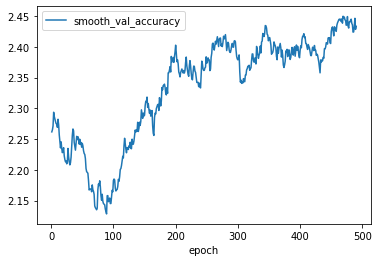

In [ ]:
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history, label="smooth_val_accuracy")
plt.xlabel("epoch")
plt.legend()

In [ ]:
reg_model = build_model()

history = reg_model.fit(train_data,
                        train_labels,epochs = 95,
                        batch_size = 16,
                        verbose = 1)

test_mse_score, test_mae_score = reg_model.evaluate(test_data, test_labels)

Epoch 1/80
404/404 [==============================] - 0s 249us/step - loss: 501.3508 - mae: 20.5554
Epoch 2/80
404/404 [==============================] - 0s 69us/step - loss: 333.2231 - mae: 16.2083
Epoch 3/80
404/404 [==============================] - 0s 75us/step - loss: 170.4282 - mae: 10.7074
Epoch 4/80
404/404 [==============================] - 0s 81us/step - loss: 78.2572 - mae: 6.8680
Epoch 5/80
404/404 [==============================] - 0s 74us/step - loss: 46.1599 - mae: 5.0835
Epoch 6/80
404/404 [==============================] - 0s 86us/step - loss: 31.5976 - mae: 4.0856
Epoch 7/80
404/404 [==============================] - 0s 80us/step - loss: 25.0758 - mae: 3.5493
Epoch 8/80
404/404 [==============================] - 0s 59us/step - loss: 21.5972 - mae: 3.2528
Epoch 9/80
404/404 [==============================] - 0s 60us/step - loss: 19.4321 - mae: 3.0485
Epoch 10/80
404/404 [==============================] - 0s 53us/step - loss: 17.7508 - mae: 2.8859
Epoch 11/80
404/404 [=

In [ ]:
test_mae_score

2.581916093826294

In [ ]:
test_mse_score

18.097661934646904